<a href="https://colab.research.google.com/github/ogundipe/AkinwaleDataScience/blob/master/Disstertation_Data_Descriptive_and_Vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing packages

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df= pd.read_csv ('/content/drive/MyDrive/peadiatric_update_Final.csv')

In [ ]:
df.shape #This shows the dimensions of the dataset, with 106,403 rows and 26 variables

(106403, 26)

In [ ]:
df.info() #This will give the types of data and variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106403 entries, 0 to 106402
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ip                             106403 non-null  object 
 1   state_name                     106403 non-null  object 
 2   map_code                       106403 non-null  object 
 3   lga_name                       106403 non-null  object 
 4   facility_name                  106403 non-null  object 
 5   sex                            106403 non-null  object 
 6   age_at_art_initiation          106384 non-null  float64
 7   current_age                    106403 non-null  int64  
 8   art_start_date                 106403 non-null  object 
 9   first_confirmed_hiv_test_date  87645 non-null   object 
 10  last_drug_pickup_date          100390 non-null  object 
 11  last_drug_regimen              99792 non-null   object 
 12  last_clinic_visit_date        

In [ ]:
df.head(5) #to view the first 5 rows of the dataset

,ip,state_name,map_code,lga_name,facility_name,sex,age_at_art_initiation,current_age,art_start_date,first_confirmed_hiv_test_date,...,clinical_stage,tb_status,patient_has_died,patient_deceased_date,is_surge_site,currentStatus_28,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Chemonics_SHARP_TO3,Yobe,ng-yo,Potiskum,Potiskum General Hospital,F,3.0,11,15/10/2014,15/02/2013,...,I,CT,1.0,01/02/2015,0,Inactive,NaN,NaN,NaN,NaN
1,JHPIEGO,Cross River,ng-cr,Obudu,Sacred Heart Catholic Hospital,M,7.0,9,14/02/2020,14/02/2020,...,I,NaN,0.0,NaN,0,Active,NaN,NaN,NaN,NaN
2,APIN,Osun,ng-os,Ife Central,Obafemi Awolowo University Teaching Hospital C...,M,0.0,4,30/10/2018,31/10/2018,...,2,CT,0.0,NaN,1,Inactive,NaN,NaN,NaN,NaN
3,APIN,Benue,ng-be,Kwande,Nongu u Kristu ke Sudan hen Tiv (NKST) Hospita...,M,3.0,8,02/04/2018,02/04/2019,...,I,CT,0.0,NaN,1,Active,NaN,NaN,NaN,NaN
4,CIHP,Kaduna,ng-kd,Kaduna South,Yusuf Dantsoho Memorial Hospital,F,0.0,10,14/08/2012,05/03/2014,...,I,CT,0.0,NaN,1,Inactive,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum() # this shows the total missing numbers per features in the dataset

ip                                    0
state_name                            0
map_code                              0
lga_name                              0
facility_name                         0
sex                                   0
age_at_art_initiation                19
current_age                           0
art_start_date                        0
first_confirmed_hiv_test_date     18758
last_drug_pickup_date              6013
last_drug_regimen                  6611
last_clinic_visit_date             4099
days_of_arv_refill                 6013
current_viral_load                47188
date_of_current_viral_load        47198
clinical_stage                    22596
tb_status                         28397
patient_has_died                    537
patient_deceased_date            101424
is_surge_site                         0
currentStatus_28                      0
Unnamed: 22                      106403
Unnamed: 23                      106403
Unnamed: 24                      106403


In [ ]:
columns_to_drop =['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'patient_deceased_date','date_of_current_viral_load']
df = df.drop(columns_to_drop, axis=1) # Droping columns that are not useful for the modeling

In [ ]:
df.shape #This gives us the dimensions of the dataset

(106403, 20)

Descriptive Data Analysis

Divinding the states into the geopolitical zones as discrible in the methodology

In [ ]:
def group_categories(category):
    # Adding custom logic to map the original categories to the new groups
    if category in ['Akwa Ibom', 'Bayelsa', 'Cross River','Edo']:
        return 'South_South'
    elif category in ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']:
        return 'South_East'
    elif category in ['Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']:
        return 'South_West'
    elif category in ['FCT','Nasarrawa','Niger','Kwara', 'Benue']:
        return 'North_Central'
    elif category in ['Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe']:
        return 'North_East'
    else:
        return 'North_West'

In [ ]:
df['grouped_categorical'] = df['state_name'].apply(group_categories)

In [ ]:
# Rename the column label 'GeoPolitical zones'
df.rename(columns={'grouped_categorical': 'GeoPolitical zones'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106403 entries, 0 to 106402
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ip                             106403 non-null  object 
 1   state_name                     106403 non-null  object 
 2   map_code                       106403 non-null  object 
 3   lga_name                       106403 non-null  object 
 4   facility_name                  106403 non-null  object 
 5   sex                            106403 non-null  object 
 6   age_at_art_initiation          106384 non-null  float64
 7   current_age                    106403 non-null  int64  
 8   art_start_date                 106403 non-null  object 
 9   first_confirmed_hiv_test_date  87645 non-null   object 
 10  last_drug_pickup_date          100390 non-null  object 
 11  last_drug_regimen              99792 non-null   object 
 12  last_clinic_visit_date        

In [ ]:
import matplotlib.pyplot as plt

To generate a bar chart of the distribution of participants by geopolitical zones in the study

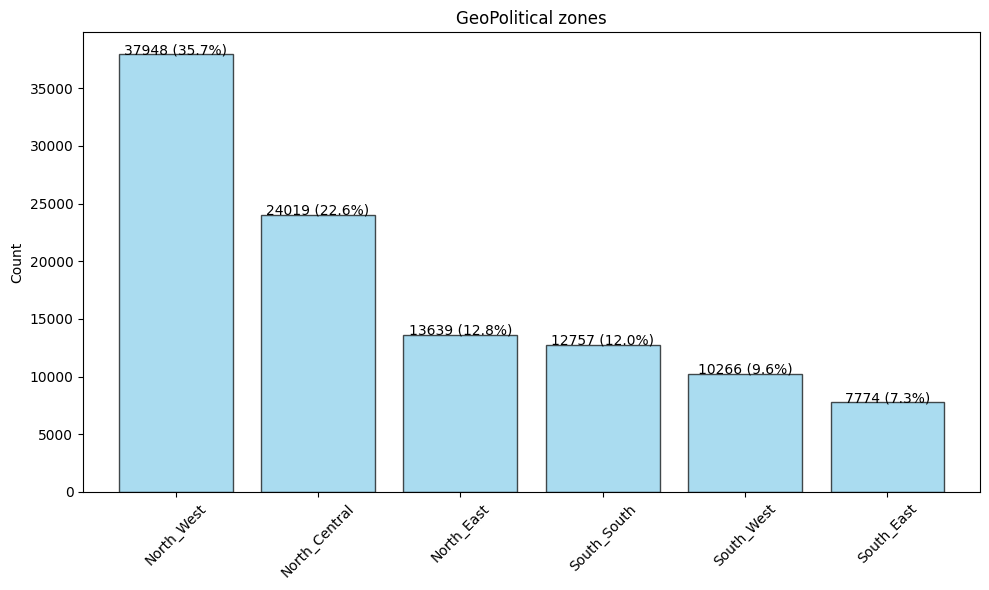

In [ ]:
# To count the occurrences of each category
category_counts = df['GeoPolitical zones'].value_counts()

# To calculate the percentage composition
total_categories = len(df['GeoPolitical zones'])
percentage_composition = (category_counts / total_categories) * 100

# To create a new DataFrame to hold the counts and percentages
summary_df = pd.DataFrame({
    'Count': category_counts,
    'Percentage Composition': percentage_composition
})

# Sorting DataFrame by count in descending order, and polting the bar chart
summary_df = summary_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
summary_df['Count'].plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black', width=0.8)
plt.ylabel('Count')
plt.title('GeoPolitical zones')
plt.xticks(rotation=45)

for i, count in enumerate(summary_df['Count']):
    plt.text(i, count + 1, f'{count} ({summary_df["Percentage Composition"].iloc[i]:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

To generate a bar chart of the distribution of participants by their current age in the study

In [ ]:
# To define the age class boundaries
age_bins = [0, 1, 5, 10, 15, float('inf')]  # Five age classes: <1, 1-4, 5-9, 10-14, and 15 and above

# the labels for the age classes is defined as
age_labels = ['<1', '1-4', '5-9', '10-14', '15+']

# the 'age_class' column is computed using pd.cut()
df['age_class'] = pd.cut(df['current_age'], bins=age_bins, labels=age_labels, right=False)

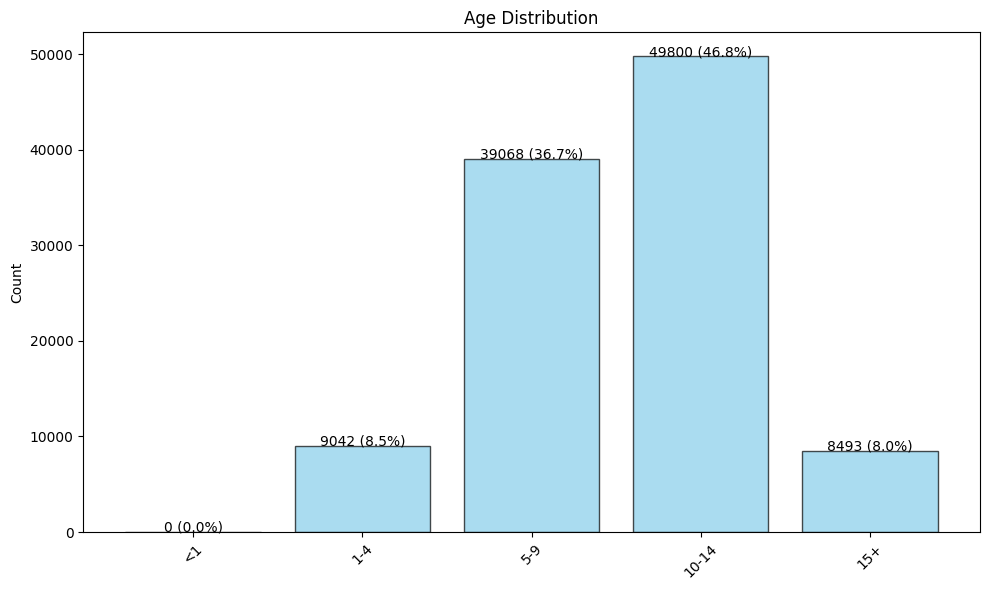

In [ ]:
#  the count of each age class
age_class_counts = df['age_class'].value_counts()

total_individuals = len(df)
age_class_percentages = (age_class_counts / total_individuals) * 100

# A new DataFrame is create to hold the counts and percentages, and sorted by age
age_class_summary = pd.DataFrame({
    'Count': age_class_counts,
    'Percentage': age_class_percentages
})
age_class_summary = age_class_summary.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_class_summary['Count'].plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black', width=0.8)
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)

# Adding percentage labels to the bars
for i, count in enumerate(age_class_summary['Count']):
    percentage = age_class_summary['Percentage'].iloc[i]
    plt.text(i, count + 1, f'{count} ({percentage:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

To generate a bar chart of the distribution of participants by their age_at_art_initiation in the study

<Figure size 1000x600 with 0 Axes>

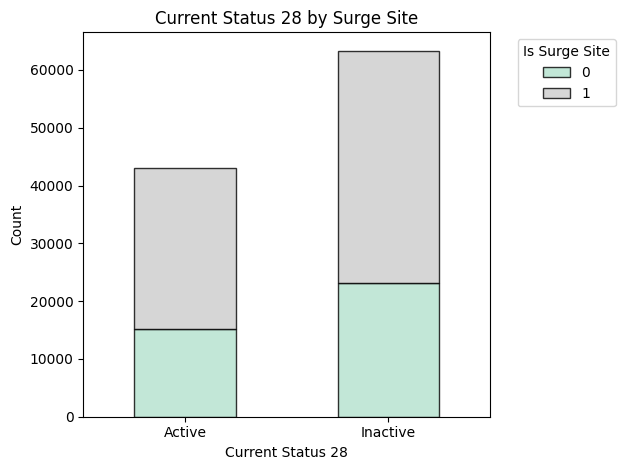

In [ ]:
# Contingency table to count the occurrences of each combination created
contingency_table = pd.crosstab(df['currentStatus_28'], df['is_surge_site'])

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)
plt.xlabel('Current Status 28')
plt.ylabel('Count')
plt.title('Current Status 28 by Surge Site')

plt.legend(title='Is Surge Site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

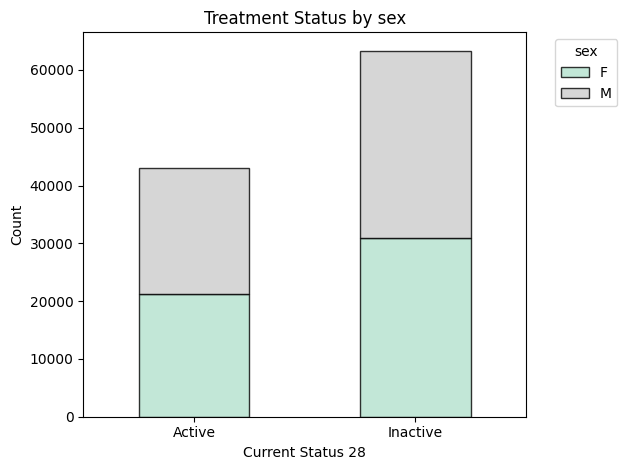

In [ ]:
contingency_table = pd.crosstab(df['currentStatus_28'], df['sex'])

# Plot a stacked bar chart to show the relationship
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)
plt.xlabel('Current Status 28')
plt.ylabel('Count')
plt.title('Treatment Status by sex')

plt.legend(title='sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

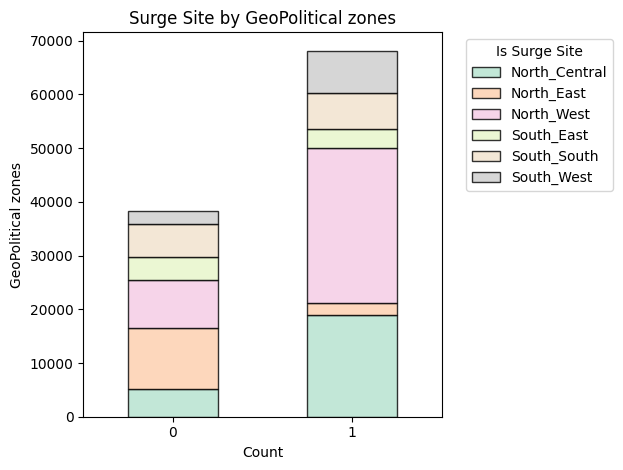

In [ ]:
cross_table = pd.crosstab(df['GeoPolitical zones'], df['is_surge_site'])

# Transposing the contingency table to have Geopolitical zones on the y-axis and Surge Site on the x-axis
transposed_cross_table = cross_table.transpose()

# Plot a stacked bar chart to show the relationship
plt.figure(figsize=(10, 6))
transposed_cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)
plt.ylabel('GeoPolitical zones')
plt.xlabel('Count')
plt.title('Surge Site by GeoPolitical zones')

plt.legend(title='Is Surge Site', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the spacing between bars and labels
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

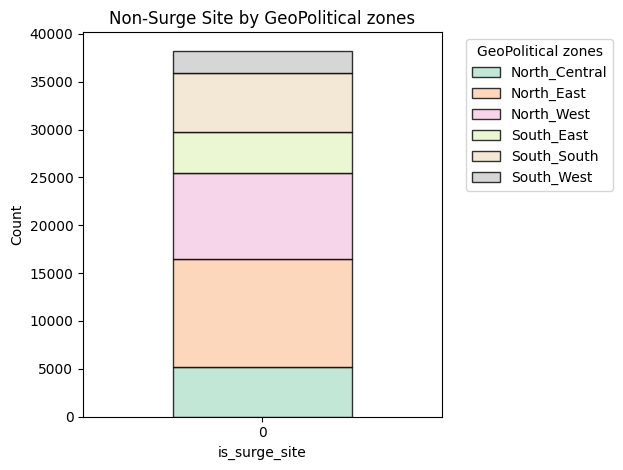

In [ ]:
# Filter the DataFrame to include only rows where 'is_surge_site' is 0 (non-surge site)
non_surge_df = df[df['is_surge_site'] == 0]

cross_table = pd.crosstab(non_surge_df['GeoPolitical zones'], non_surge_df['is_surge_site'])

# Transpose the contingency table to have Geopolitical zones on the y-axis and Surge Site on the x-axis
transposed_cross_table = cross_table.transpose()

# Ploting a stacked bar chart to show the relationship for non-surge sites (is_surge_site = 0)
plt.figure(figsize=(10, 6))
ax = transposed_cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)

# Creating labels for each bar in the stacked bar chart
labels = transposed_cross_table.index.tolist()
ax.set_xticklabels(labels)

plt.ylabel('Count')
plt.title('Non-Surge Site by GeoPolitical zones')

# Adding the legend for GeoPolitical zones
plt.legend(title='GeoPolitical zones', bbox_to_anchor=(1.05, 1), loc='upper left')

# To adjust the spacing between bars and labels
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

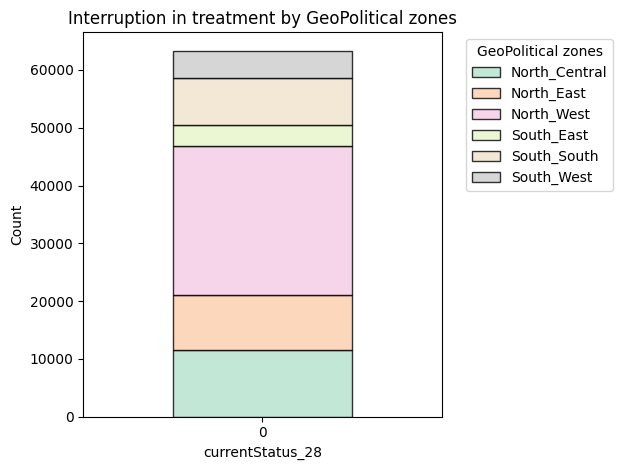

In [ ]:
# Convert 'Inactive' to 0 in the 'currentStatus_28' column
df['currentStatus_28'] = df['currentStatus_28'].replace('Inactive', 0)


df['currentStatus_28'] = df['currentStatus_28'].replace('Inactive', 0)

# Filtering the DataFrame to include only rows with 'currentStatus_28' equal to 0 (i.e., "Inactive")
inactive_df = df[df['currentStatus_28'] == 0]

# Contingency table to count the occurrences of each combination
cross_table = pd.crosstab(inactive_df['GeoPolitical zones'], inactive_df['currentStatus_28'])

# Transpose the contingency table to have Geopolitical zones on the y-axis and Surge Site on the x-axis
transposed_cross_table = cross_table.transpose()

# Plot a stacked bar chart to show the relationship for "Inactive" category
plt.figure(figsize=(10, 6))
ax = transposed_cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)

# Set the labels for each bar in the stacked bar chart
labels = transposed_cross_table.index.tolist()
ax.set_xticklabels(labels)

plt.ylabel('Count')
plt.title('Interruption in treatment by GeoPolitical zones')


plt.legend(title='GeoPolitical zones', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

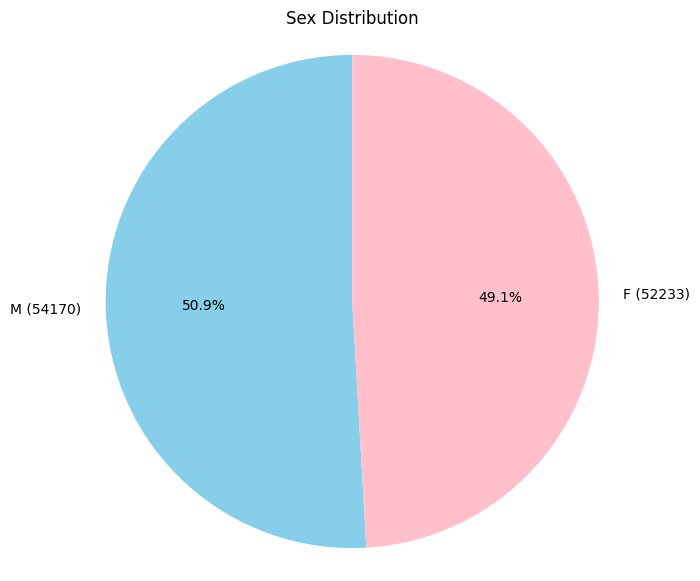

In [ ]:
# To calculate the count of each sex category
sex_counts = df['sex'].value_counts()

# To create labels with category name and count
labels = [f'{category} ({count})' for category, count in zip(sex_counts.index, sex_counts)]

plt.figure(figsize=(7, 7))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Sex Distribution')

plt.show()

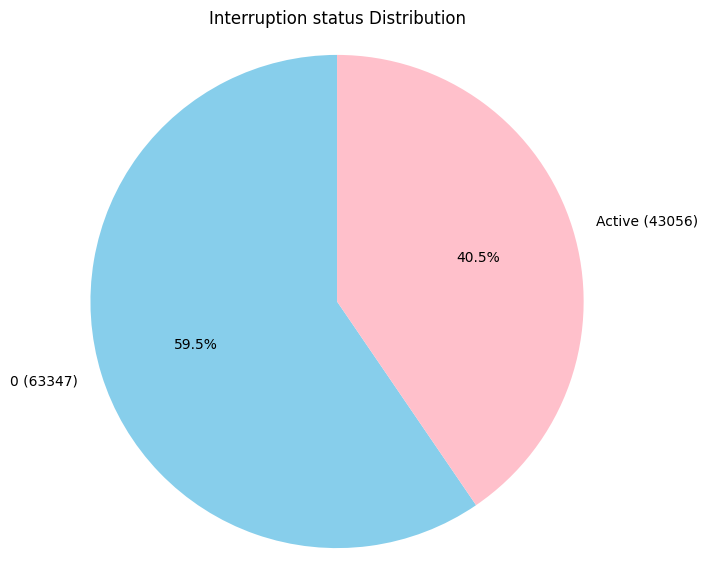

In [ ]:
import matplotlib.pyplot as plt


currentStatus_28_counts = df['currentStatus_28'].value_counts()

# Creating labels with category name and count
labels = [f'{category} ({count})' for category, count in zip(currentStatus_28_counts.index, currentStatus_28_counts)]

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(currentStatus_28_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Interruption status Distribution')

plt.show()

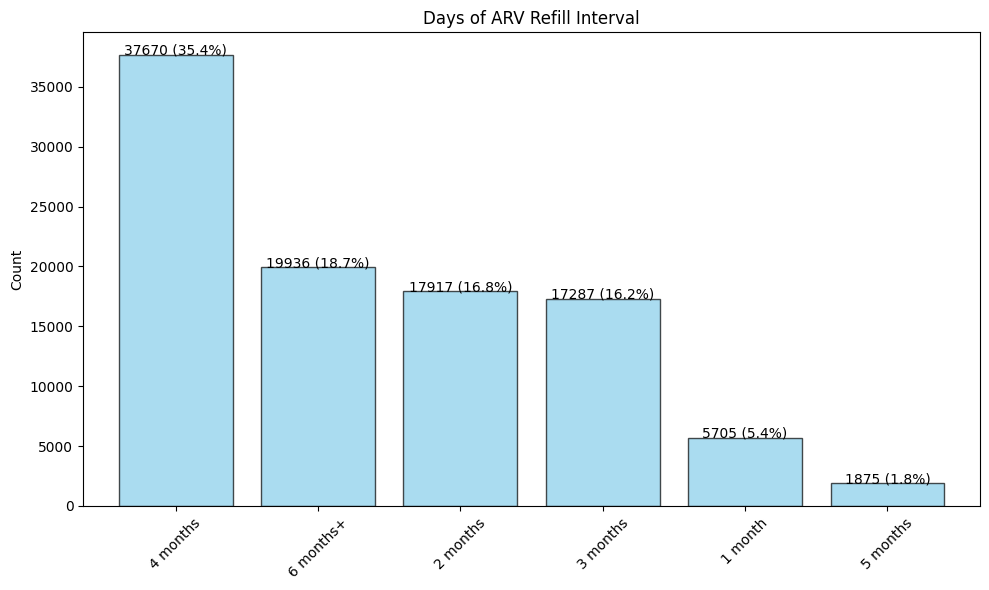

In [ ]:
#  the count of each days_of_arv_refill
# Define the intervals in days for 1, 2, 3, 4, 5, and 6 months plus
intervals = [0, 30, 60, 90, 120, 150, float('inf')]

# Define the labels for the intervals
interval_labels = ['1 month', '2 months', '3 months', '4 months', '5 months', '6 months+']

# Use pd.cut() to create the 'refill_interval' column
df['refill_interval'] = pd.cut(df['days_of_arv_refill'], bins=intervals, labels=interval_labels, right=False)

# Set the 'refill_interval' column as a categorical data type with a specified order
df['refill_interval'] = pd.Categorical(df['refill_interval'], categories=interval_labels, ordered=True)

# Calculate the count of each refill_interval category
interval_counts = df['refill_interval'].value_counts()

# Calculate the percentage of each refill_interval category
total_refills = len(df)
interval_percentages = (interval_counts / total_refills) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = interval_counts.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black', width=0.8)
plt.ylabel('Count')
plt.title('Days of ARV Refill Interval')

plt.xticks(rotation=45)

# Add percentage labels to the bars
for i, count in enumerate(interval_counts):
    percentage = interval_percentages.iloc[i]
    plt.text(i, count + 1, f'{count} ({percentage:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

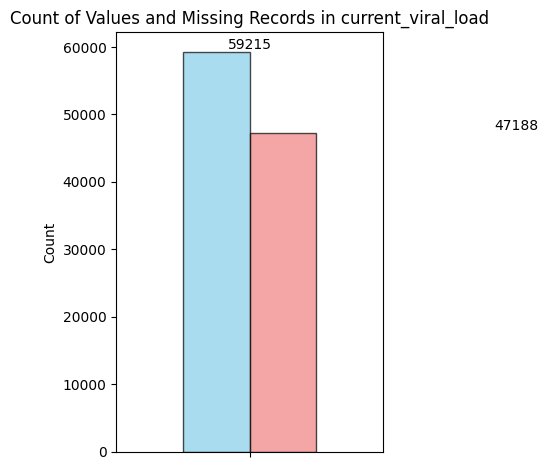

In [ ]:
# Get the count of non-missing values and missing values for current_viral_load
non_missing_count = df['current_viral_load'].count()
missing_count = df['current_viral_load'].isnull().sum()

# Create a DataFrame to hold the counts
data = {
    'Count of Values': [non_missing_count],
    'Count of Missing Records': [missing_count]
}
counts_df = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(6, 6))
counts_df.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black', legend=False)

plt.ylabel('Count')
plt.title('Count of Values and Missing Records in current_viral_load')

plt.xticks(ticks=[0], labels=[''])  # Hide x-axis label

# Add labels to the bars
for index, value in enumerate(counts_df.values.flatten()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Patterns of treatmenmt interruption**

Treatment inactive pattern by geopoliticial zones

In [ ]:
import seaborn as sns

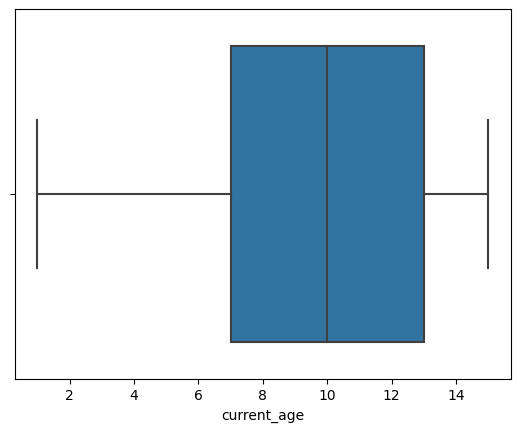

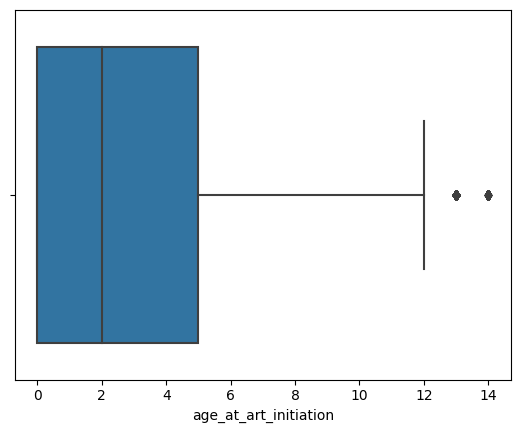

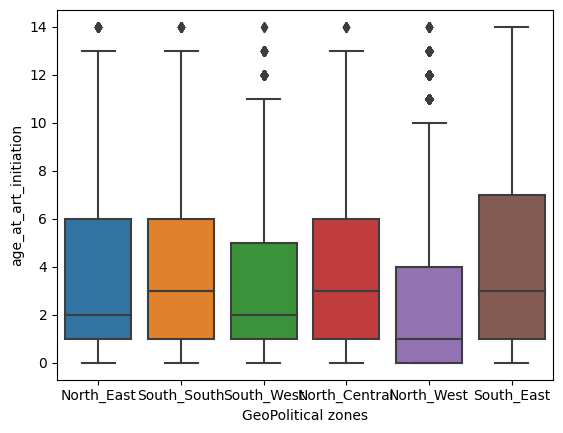

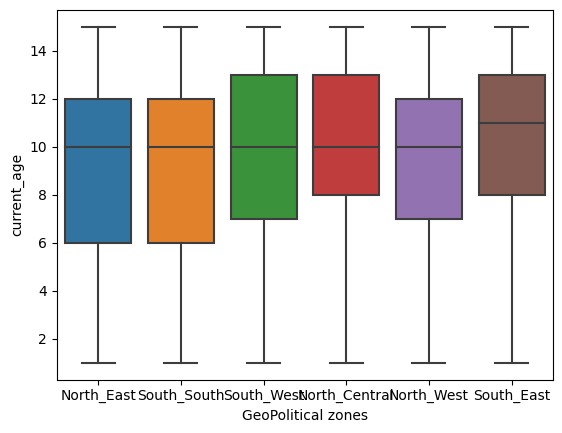

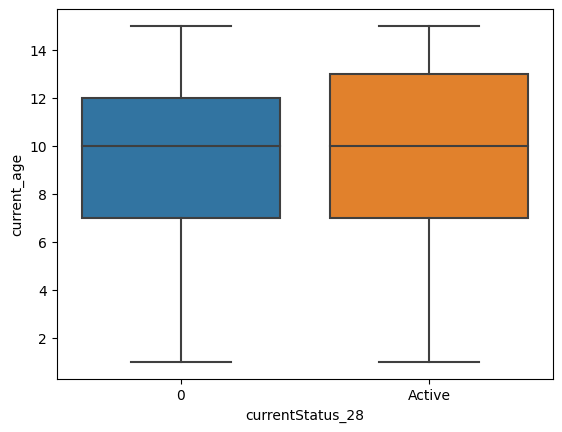

In [ ]:
sns.boxplot(x=df["current_age"])
plt.show()

sns.boxplot(x=df["age_at_art_initiation"])
plt.show()

sns.boxplot(x="GeoPolitical zones", y="age_at_art_initiation", data=df)
plt.show()

sns.boxplot(x="GeoPolitical zones", y="current_age", data=df)
plt.show()

sns.boxplot(x="currentStatus_28", y="current_age", data=df)
plt.show()


<Figure size 1000x600 with 0 Axes>

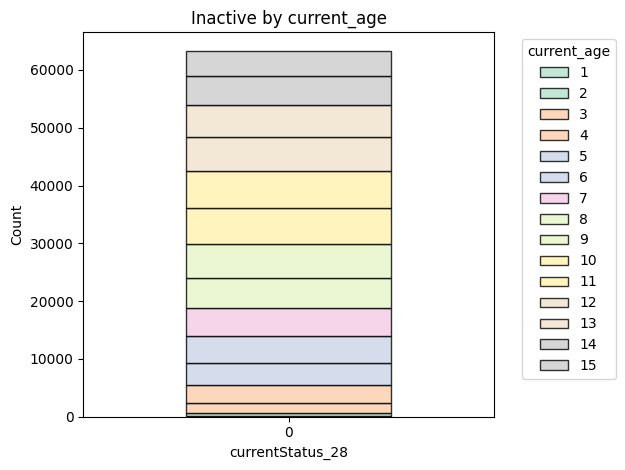

In [ ]:
# Filter the DataFrame to include only rows where 'currentStatus_28' is 0 (inactive)
non_surge_df = df[df['currentStatus_28'] == 0]

# Create a contingency table to count the occurrences of each combination
cross_table = pd.crosstab(non_surge_df['current_age'], non_surge_df['currentStatus_28'])

# Transpose the contingency table to have Geopolitical zones on the y-axis and Surge Site on the x-axis
transposed_cross_table = cross_table.transpose()

# Plot a stacked bar chart to show the relationship for non-surge sites (is_surge_site = 0)
plt.figure(figsize=(10, 6))
ax = transposed_cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)

# Set the labels for each bar in the stacked bar chart
labels = transposed_cross_table.index.tolist()
ax.set_xticklabels(labels)

plt.ylabel('Count')
plt.title('Inactive by current_age')

# Add the legend for GeoPolitical zones
plt.legend(title='current_age', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the spacing between bars and labels
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

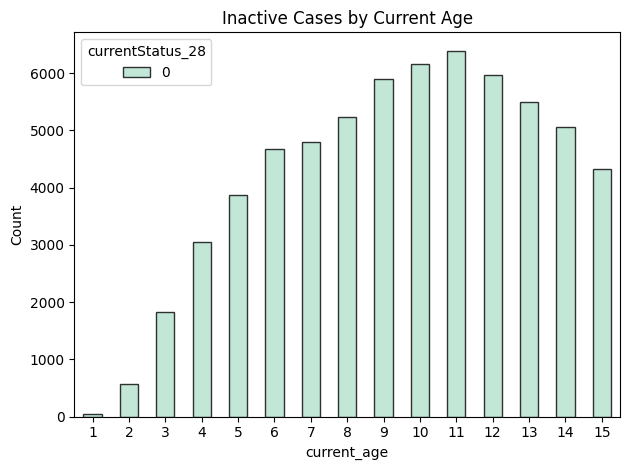

In [ ]:
# Filter the DataFrame to include only rows where 'currentStatus_28' is 0 (inactive)
inactive_df = df[df['currentStatus_28'] == 0]

# Create a contingency table to count the occurrences of each combination
cross_table = pd.crosstab(inactive_df['current_age'], inactive_df['currentStatus_28'])

# Plot a stacked bar chart to show the relationship for inactive cases by current age
plt.figure(figsize=(10, 6))
ax = cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)

# Set the labels for each bar in the stacked bar chart
labels = cross_table.index.tolist()
ax.set_xticklabels(labels)

plt.ylabel('Count')
plt.title('Inactive Cases by Current Age')

# Adjust the spacing between bars and labels
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Figure size 1200x800 with 0 Axes>

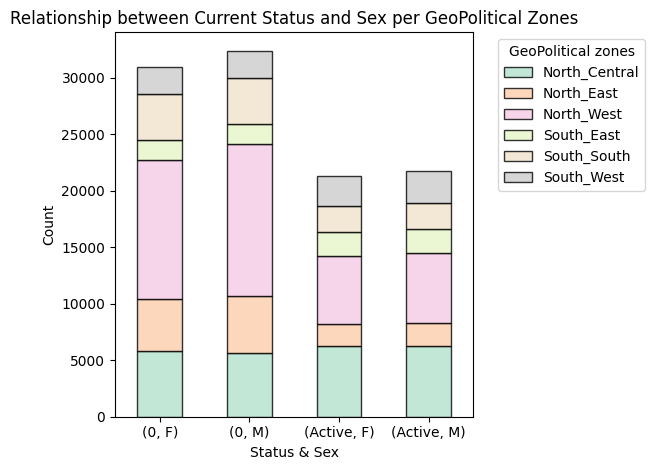

In [ ]:
# Create a contingency table to count the occurrences of each combination
cross_table = pd.crosstab(index=[df['currentStatus_28'], df['sex']], columns=df['GeoPolitical zones'])

# Plot a stacked bar chart to show the relationship between currentStatus_28 and sex per GeoPolitical zones
plt.figure(figsize=(12, 8))
cross_table.plot(kind='bar', stacked=True, colormap='Pastel2', edgecolor='black', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Status & Sex')
plt.title('Relationship between Current Status and Sex per GeoPolitical Zones')

# Add the legend for GeoPolitical zones
plt.legend(title='GeoPolitical zones', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the spacing between bars and labels
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

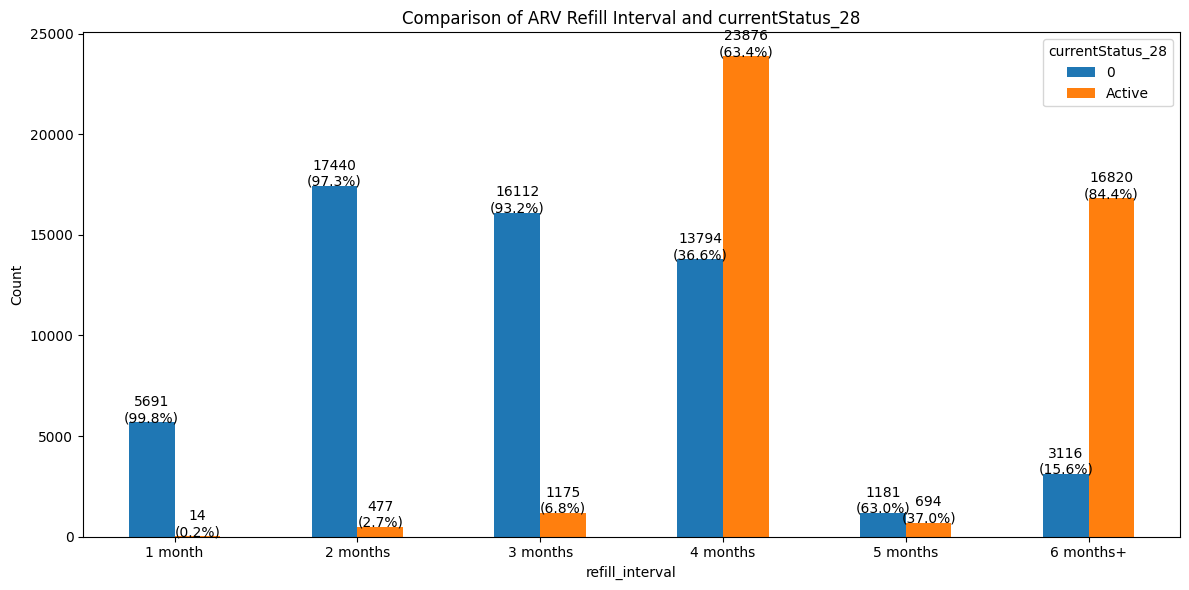

In [ ]:
# Define the intervals in days for 1, 2, 3, 4, 5, and 6 months plus
intervals = [0, 30, 60, 90, 120, 150, float('inf')]

# Define the labels for the intervals
interval_labels = ['1 month', '2 months', '3 months', '4 months', '5 months', '6 months+']

# Use pd.cut() to create the 'refill_interval' column
df['refill_interval'] = pd.cut(df['days_of_arv_refill'], bins=intervals, labels=interval_labels, right=False)

# Set the 'refill_interval' column as a categorical data type with a specified order
df['refill_interval'] = pd.Categorical(df['refill_interval'], categories=interval_labels, ordered=True)

# To calculate the count of each refill_interval and currentStatus_28 category
grouped_counts = df.groupby(['refill_interval', 'currentStatus_28']).size().unstack()

# To calculate the total counts for each interval
interval_totals = grouped_counts.sum(axis=1)

# To calculate the percentage of each category within each interval
grouped_percentages = (grouped_counts.T / interval_totals * 100).T

# Plot the grouped bar chart with percentage annotations
plt.figure(figsize=(12, 6))
bars = grouped_counts.plot(kind='bar', ax=plt.gca())
plt.ylabel('Count')
plt.title('Comparison of ARV Refill Interval and currentStatus_28')

plt.xticks(rotation=0)
plt.legend(title='currentStatus_28')

# Annotate bars with percentage values
for i, patch in enumerate(bars.patches):
    interval_width = bars.patches[int(i/len(interval_labels))].get_width()
    x = patch.get_x() + interval_width / 2
    category_index = i % len(interval_labels)
    category = interval_labels[category_index]
    count = grouped_counts.loc[category].iloc[int(i/len(interval_labels))]
    percentage = grouped_percentages.loc[category].iloc[int(i/len(interval_labels))]
    plt.text(x, count + 1, f'{count}\n({percentage:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

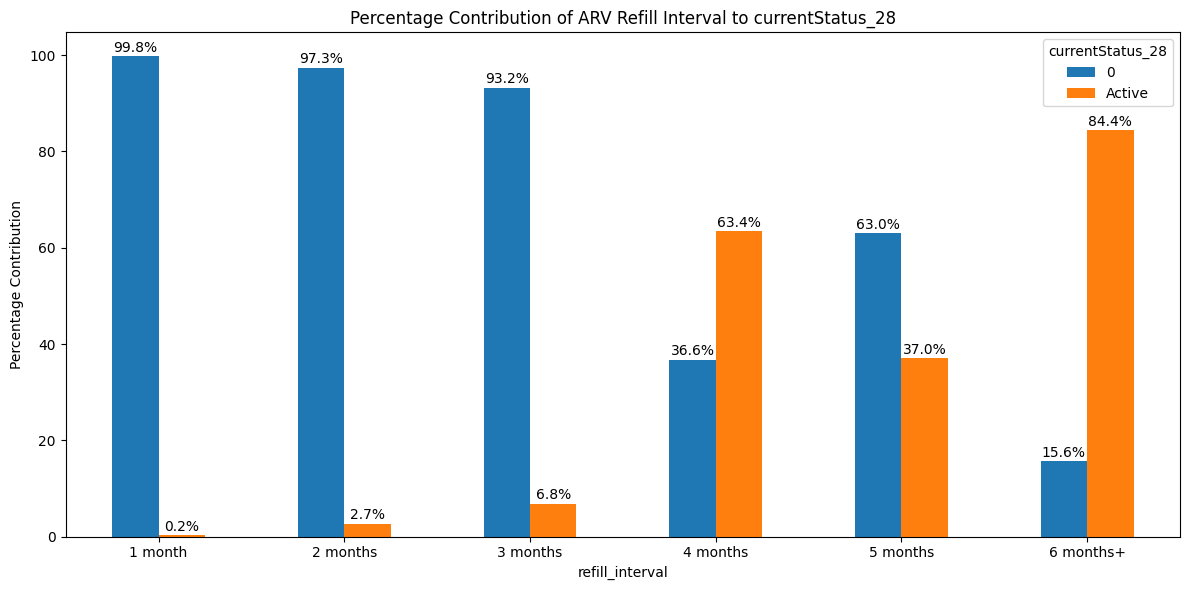

In [ ]:
# Define the intervals in days for 1, 2, 3, 4, 5, and 6 months plus
intervals = [0, 30, 60, 90, 120, 150, float('inf')]

# Define the labels for the intervals
interval_labels = ['1 month', '2 months', '3 months', '4 months', '5 months', '6 months+']

# Use pd.cut() to create the 'refill_interval' column
df['refill_interval'] = pd.cut(df['days_of_arv_refill'], bins=intervals, labels=interval_labels, right=False)

# Set the 'refill_interval' column as a categorical data type with a specified order
df['refill_interval'] = pd.Categorical(df['refill_interval'], categories=interval_labels, ordered=True)

# Calculate the count of each currentStatus_28 category within each refill_interval
grouped_counts = df.groupby(['refill_interval', 'currentStatus_28']).size().unstack()

# Calculate the total counts for each category of refill_interval
interval_totals = grouped_counts.sum(axis=1)

# Calculate the percentage contribution of each category of currentStatus_28 to the interval
grouped_percentage_contributions = (grouped_counts.T / interval_totals * 100).T

# Plot the grouped bar chart with percentage annotations
plt.figure(figsize=(12, 6))
bars = grouped_percentage_contributions.plot(kind='bar', ax=plt.gca())
plt.ylabel('Percentage Contribution')
plt.title('Percentage Contribution of ARV Refill Interval to currentStatus_28')

plt.xticks(rotation=0)
plt.legend(title='currentStatus_28')

# Annotate bars with percentage values
for i, patch in enumerate(bars.patches):
    interval_width = bars.patches[int(i/len(interval_labels))].get_width()
    x = patch.get_x() + interval_width / 2
    category_index = i % len(interval_labels)
    category = interval_labels[category_index]
    contribution = grouped_percentage_contributions.loc[category].iloc[int(i/len(interval_labels))]
    plt.text(x, contribution + 1, f'{contribution:.1f}%', ha='center')

plt.tight_layout()
plt.show()

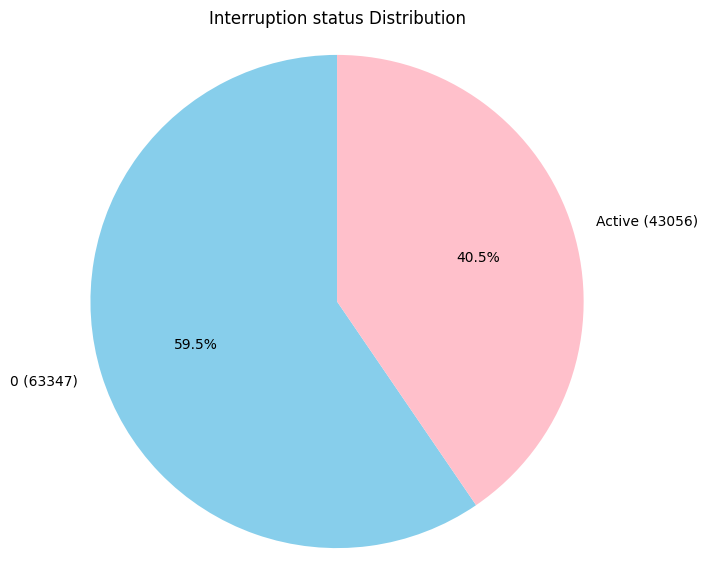

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each currentStatus_28 category
currentStatus_28_counts = df['currentStatus_28'].value_counts()

# Create labels with category name and count
labels = [f'{category} ({count})' for category, count in zip(currentStatus_28_counts.index, currentStatus_28_counts)]

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(currentStatus_28_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Interruption status Distribution')

plt.show()